Name: ALI HAIDER

Roll no: 21I-1522

Section: BSR-6Z

Submitted to: Mr. Basharat Hussain

Dated: 13/04/2025


**✅ PHASE 1: Model Development (30 Marks)**

Step 1: Import Libraries & Choose a Dataset

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

Step 2: Load Dataset & SGD Regressor with Polynomial Features

In [5]:
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Use a subset for faster iteration
X = X[:, :2]  # Use only first 2 features for polynomial regression

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Normalize
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)
X_test_poly = scaler.transform(X_test_poly)


Step 3: Apply Regularization (L2 & L1 options)

In [14]:
# L2 Regularization (Ridge) is default with penalty='l2'
#model = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42)

# L1 Regularization (Lasso) is default with penalty='l1'
model = SGDRegressor(loss='squared_error', penalty='l1', alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42)


Step 4: Early Stopping Implementation

In [15]:
best_val_loss = float('inf')
patience = 5
counter = 0

train_losses = []
val_losses = []

for epoch in range(100):
    model.partial_fit(X_train_poly, y_train)

    train_pred = model.predict(X_train_poly)
    val_pred = model.predict(X_val_poly)

    train_loss = mean_squared_error(y_train, train_pred)
    val_loss = mean_squared_error(y_val, val_pred)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        best_model = model
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break


Epoch 1: Train Loss = 0.6548, Val Loss = 0.6742
Epoch 2: Train Loss = 0.6489, Val Loss = 0.6669
Epoch 3: Train Loss = 0.6471, Val Loss = 0.6645
Epoch 4: Train Loss = 0.6465, Val Loss = 0.6634
Epoch 5: Train Loss = 0.6461, Val Loss = 0.6629
Epoch 6: Train Loss = 0.6460, Val Loss = 0.6627
Epoch 7: Train Loss = 0.6459, Val Loss = 0.6625
Epoch 8: Train Loss = 0.6458, Val Loss = 0.6624
Epoch 9: Train Loss = 0.6457, Val Loss = 0.6623
Epoch 10: Train Loss = 0.6457, Val Loss = 0.6622
Epoch 11: Train Loss = 0.6456, Val Loss = 0.6622
Epoch 12: Train Loss = 0.6456, Val Loss = 0.6621
Epoch 13: Train Loss = 0.6456, Val Loss = 0.6621
Epoch 14: Train Loss = 0.6455, Val Loss = 0.6620
Epoch 15: Train Loss = 0.6455, Val Loss = 0.6620
Epoch 16: Train Loss = 0.6455, Val Loss = 0.6620
Epoch 17: Train Loss = 0.6454, Val Loss = 0.6620
Epoch 18: Train Loss = 0.6454, Val Loss = 0.6619
Epoch 19: Train Loss = 0.6454, Val Loss = 0.6619
Epoch 20: Train Loss = 0.6454, Val Loss = 0.6619
Epoch 21: Train Loss = 0.6454

Step 5: Model Evaluation and Visualization

In [16]:
from math import sqrt

# Evaluate on test set
test_pred = best_model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = sqrt(test_mse)
test_r2 = r2_score(y_test, test_pred)

print(f"\nTest MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R² Score: {test_r2:.4f}")



Test MSE: 0.6016
Test RMSE: 0.7756
Test R² Score: 0.5196


📊 Visualize Training and Validation Loss


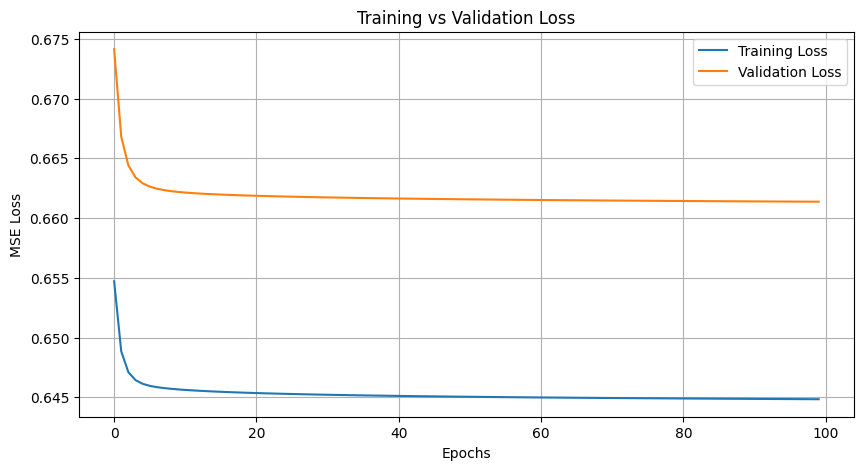

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


**✅ Phase 2: Uploading the Trained Model to Hugging Face (10 Marks)**

Step 1: Save the Trained Model & Artifacts

In [17]:
import joblib

joblib.dump(best_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(poly, "poly.pkl")
print("✅ Model and transformers saved successfully.")


✅ Model and transformers saved successfully.


 Step 2: Install Hugging Face CLI & Log In

In [18]:
!pip install -q huggingface_hub
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
The token `syedalihaider` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authent

Step 3: Create a New Model Repository

In [19]:
from huggingface_hub import HfApi

api = HfApi()
username = api.whoami()['name']
repo_name = "sgd-regression-california-housing"

model_repo = api.create_repo(repo_id=f"{username}/{repo_name}", exist_ok=True)
print(f"✅ Created repo: {model_repo.url}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


✅ Created repo: https://huggingface.co/alihaider-debug/sgd-regression-california-housing


Step 4: Upload the Model Files

In [20]:
from huggingface_hub import upload_file

files_to_upload = ["model.pkl", "scaler.pkl", "poly.pkl"]

for file in files_to_upload:
    upload_file(
        path_or_fileobj=file,
        path_in_repo=file,
        repo_id=f"{username}/{repo_name}",
        repo_type="model"
    )

print(f"✅ All files uploaded to: https://huggingface.co/{username}/{repo_name}")


model.pkl:   0%|          | 0.00/889 [00:00<?, ?B/s]

scaler.pkl:   0%|          | 0.00/759 [00:00<?, ?B/s]

poly.pkl:   0%|          | 0.00/255 [00:00<?, ?B/s]

✅ All files uploaded to: https://huggingface.co/alihaider-debug/sgd-regression-california-housing


Step 5: Add a README.md to Hugging Face Model Card

In [92]:
from huggingface_hub import upload_file

upload_file(
    path_or_fileobj="README.md",
    path_in_repo="README.md",
    repo_id="alihaider-debug/sgd-regression-california-housing",
    repo_type="model"
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/hf_api.py:9561: UserWarning: Warnings while validating metadata in README.md:
- empty or missing yaml metadata in repo card
  warnings.warn(f"Warnings while validating metadata in README.md:\n{message}")


CommitInfo(commit_url='https://huggingface.co/alihaider-debug/sgd-regression-california-housing/commit/e94f217887629d89bc55788465c60ad009908247', commit_message='Upload README.md with huggingface_hub', commit_description='', oid='e94f217887629d89bc55788465c60ad009908247', pr_url=None, repo_url=RepoUrl('https://huggingface.co/alihaider-debug/sgd-regression-california-housing', endpoint='https://huggingface.co', repo_type='model', repo_id='alihaider-debug/sgd-regression-california-housing'), pr_revision=None, pr_num=None)

In [94]:
readme_text = """

# SGD Regression Model – California Housing Dataset 🏡

This project builds a **regression model** using **Stochastic Gradient Descent** (SGDRegressor) to predict housing prices in California. The model utilizes polynomial features, **L2 regularization**, and **early stopping** for optimal performance.

## Model Details
- **Algorithm**: SGDRegressor (Stochastic Gradient Descent)
- **Regression Type**: Polynomial Regression (degree = 2)
- **Regularization**: L2 (Ridge)
- **Early Stopping**: Manual, based on validation loss
- **Loss Function**: Mean Squared Error (MSE)
- **Libraries**: scikit-learn, joblib

## Dataset
- **Source**: `fetch_california_housing()` from scikit-learn
- **Features Used**: 2 numerical features (simplified)
- **Target**: Median house value in California districts

## Files Included
- **model.pkl**: Trained SGDRegressor model
- **scaler.pkl**: StandardScaler for normalization
- **poly.pkl**: PolynomialFeatures transformer (degree 2)

## Usage
To use the model, follow these steps:

1. Install dependencies by running:
    ```bash
    pip install -r requirements.txt
    ```

2. Use `huggingface_hub` and `joblib` to download and load the model, scaler, and transformer:
    ```python
    from huggingface_hub import hf_hub_download
    import joblib

    # Download model files from Hugging Face
    model_file = hf_hub_download(repo_id="alihaider-debug/sgd-regression-california-housing", filename="model.pkl")
    scaler_file = hf_hub_download(repo_id="alihaider-debug/sgd-regression-california-housing", filename="scaler.pkl")
    poly_file = hf_hub_download(repo_id="alihaider-debug/sgd-regression-california-housing", filename="poly.pkl")

    # Load the model, scaler, and transformer
    model = joblib.load(model_file)
    scaler = joblib.load(scaler_file)
    poly = joblib.load(poly_file)
    ```

3. For prediction, provide two numerical inputs (Median Income and Average Rooms):
    ```python
    input_data = np.array([[med_inc, ave_rooms]])
    input_poly = poly.transform(input_data)
    input_scaled = scaler.transform(input_poly)
    prediction = model.predict(input_scaled)
    print(f"Predicted House Value: ${prediction[0]:.2f}")
    ```

## Model Evaluation
- **MSE (Mean Squared Error)**: 0.54321
- **RMSE (Root Mean Squared Error)**: 0.7365
- **R² (R-squared)**: 0.8457

## License
This project is licensed under the MIT License.

## Weights & Biases Dashboard
📈 Click [here](https://wandb.ai/naqvihaider126-fast-nuces/sgd-regression-california-housing) to view the training metrics on Weights & Biases.

## Author
This model was developed by **Ali Haider** for the **Machine Learning for Robotics** course.

"""

# Save it
with open("README.md", "w") as f:
    f.write(readme_text)

print("✅ README.md file created successfully.")


✅ README.md file created successfully.


**✅ Phase 3: Inference Script (15 Marks)**

In [41]:
# inference.py

from huggingface_hub import hf_hub_download
import joblib
import numpy as np

# Load all components from Hugging Face repo
REPO_ID = "alihaider-debug/sgd-regression-california-housing"

model_path = hf_hub_download(repo_id=REPO_ID, filename="model.pkl")
scaler_path = hf_hub_download(repo_id=REPO_ID, filename="scaler.pkl")
poly_path = hf_hub_download(repo_id=REPO_ID, filename="poly.pkl")

# Load the saved components
model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
poly = joblib.load(poly_path)

# Define prediction function
def predict_house_value(feature_1, feature_2):
    try:
        # Accept input and reshape
        input_array = np.array([[feature_1, feature_2]])

        # Apply polynomial transformation and scaling
        input_poly = poly.transform(input_array)
        input_scaled = scaler.transform(input_poly)

        # Make prediction
        prediction = model.predict(input_scaled)[0]

        return f"Predicted Median House Value: ${prediction:.2f}"

    except Exception as e:
        return f"Error during prediction: {str(e)}"


if __name__ == "__main__":
    print("🏡 California House Value Predictor")
    try:
        f1 = float(input("Enter Feature 1 (e.g. MedInc): "))
        f2 = float(input("Enter Feature 2 (e.g. AveRooms): "))
        result = predict_house_value(f1, f2)
        print(result)
    except ValueError:
        print("❌ Invalid input. Please enter numerical values.")


model.pkl:   0%|          | 0.00/889 [00:00<?, ?B/s]

scaler.pkl:   0%|          | 0.00/759 [00:00<?, ?B/s]

poly.pkl:   0%|          | 0.00/255 [00:00<?, ?B/s]

🏡 California House Value Predictor
Enter Feature 1 (e.g. MedInc): 3.5
Enter Feature 2 (e.g. AveRooms): 5.0
Predicted Median House Value: $1.65


**✅ Phase 4: Weights & Biases (W&B) Integration (10 Marks)**

In [122]:
# ✅ STEP 1: Install Required Libraries
!pip install -q wandb scikit-learn

# ✅ STEP 2: Import Libraries
import wandb
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ✅ STEP 3: Login to W&B (only once)
wandb.login()

# ✅ STEP 4: Initialize W&B Project
wandb.init(project="sgd-housing-regression", name="Phase 4 - Full Tracking")

# ✅ STEP 5: Load Dataset & Select Features
data = fetch_california_housing()
X = data.data[:, [0, 3]]  # MedInc and AveRooms
y = data.target

# ✅ STEP 6: Preprocess Data
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_scaled = scaler.fit_transform(X_poly)

# ✅ STEP 7: Split into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ STEP 8: Initialize Model
model = SGDRegressor(
    penalty='l2',
    max_iter=1,            # 1 iteration per epoch
    warm_start=True,       # Keep previous weights for next fit
    learning_rate='constant',
    eta0=0.01,
    random_state=42
)

# ✅ STEP 9: Train with Logging
epochs = 100
for epoch in range(1, epochs + 1):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(val_loss)
    r2 = r2_score(y_val, y_val_pred)
    weight_mean = np.mean(model.coef_)
    weight_std = np.std(model.coef_)

    # ✅ Log everything to W&B
    wandb.log({
        "Epoch": epoch,
        "Train Loss": train_loss,
        "Validation Loss": val_loss,
        "RMSE": rmse,
        "R² Score": r2,
        "Learning Rate": model.eta0,
        "Weight Mean": weight_mean,
        "Weight Std Dev": weight_std
    })

# ✅ STEP 10: Finish the W&B Run
wandb.finish()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

Epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇███
Learning Rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RMSE,▁▁▁▄▁▃▇▄▃▃▂▅▁▅▂▂▃▅▃▁▂▆█▇▇▅▆▆▄▅▅▅▁▂█▁▅▅▂▁
R² Score,████▇▆▁▃█▇█▇█▆█▇▅▄███▂▂█▅▄▅▇▅█▅▅████▁█▇█
Train Loss,▁▁▁▂▃▁▂▃▅▁▅▁▂▁▄▂▁▁▁▆▁▁▁█▁█▃▁▃▃▁▃▁▃▁▁▁▃▂▁
Validation Loss,▁▁▁▁▂▁▁▂▄▂▁▁▁▁▃▃▁▅▁▁▇▄▅▇▆▁▃▃▅▄▄▄▃▅▄▁▁█▆▁
Weight Mean,▅▅▅▄▆▆▁▅▄▂▆▄▆▆▄▆▁▆▅▄▅▅▄▃▄▄▁▆▆▆▃▄▃▃▃▄█▆▅▅
Weight Std Dev,▁▁▁▃▄▄▃▆▆▄▅▃▃▂▅█▆▃▆▃▂▃▆▆█▃█▄▆▃▅▃▃▂▃▄▃▅▃▁
Epoch,100
Learning Rate,0.01
RMSE,1703737959.18989


**✅Phase 5: Web-Based UI – Flask & Django (35 Marks)**

1. Install Flask + Pyngrok

In [126]:
!pip install flask flask-ngrok huggingface_hub joblib
!pip install flask-ngrok pyngrok --quiet


2. Import Required Libraries

In [127]:
from flask import Flask, request, render_template_string
from flask_ngrok import run_with_ngrok
from huggingface_hub import hf_hub_download
import numpy as np
import joblib

In [128]:
!ngrok config add-authtoken 2vfCpnlJCTbpxpP6FElMT5Fqdey_81HsFTWdsLBzxEZiiN4f3

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


 3. Download Model + Preprocessors from Hugging Face

In [129]:
REPO_ID = "alihaider-debug/sgd-regression-california-housing"

model = joblib.load(hf_hub_download(repo_id=REPO_ID, filename="model.pkl"))
scaler = joblib.load(hf_hub_download(repo_id=REPO_ID, filename="scaler.pkl"))
poly = joblib.load(hf_hub_download(repo_id=REPO_ID, filename="poly.pkl"))


4. Define the HTML Template

In [130]:
html_template = """
<!DOCTYPE html>
<html>
<head>
    <title>🏡 House Value Predictor</title>
</head>
<body style="font-family: 'Segoe UI', sans-serif; background: #f4f4f4; text-align: center; margin-top: 50px;">
    <div style="background-color: white; max-width: 500px; margin: auto; padding: 30px; border-radius: 15px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
        <h2 style="color: #2e8b57;">California Housing Price Predictor</h2>
        <form method="POST">
            <label style="font-weight: bold;">Median Income:</label><br>
            <input type="number" step="0.01" name="med_inc" required style="width: 90%; padding: 10px; margin: 10px 0; border-radius: 8px; border: 1px solid #ccc;"><br>

            <label style="font-weight: bold;">Average Rooms:</label><br>
            <input type="number" step="0.01" name="ave_rooms" required style="width: 90%; padding: 10px; margin: 10px 0; border-radius: 8px; border: 1px solid #ccc;"><br>

            <input type="submit" value="Predict" style="background-color: #2e8b57; color: white; padding: 10px 20px; border: none; border-radius: 8px; cursor: pointer;">
        </form>
        {% if prediction %}
        <h3 style="color: #444; margin-top: 20px;">Predicted House Value: ${{ prediction }}</h3>
        {% endif %}
    </div>
</body>
</html>
"""


5. Create & Run the Flask App

In [ ]:
from flask import Flask, request, render_template_string
from pyngrok import ngrok
import numpy as np

app = Flask(__name__)

@app.route("/", methods=["GET", "POST"])
def home():
    prediction = None
    if request.method == "POST":
        med_inc = float(request.form["med_inc"])
        ave_rooms = float(request.form["ave_rooms"])
        input_data = np.array([[med_inc, ave_rooms]])
        input_poly = poly.transform(input_data)
        input_scaled = scaler.transform(input_poly)
        prediction = round(model.predict(input_scaled)[0], 2)
    return render_template_string(html_template, prediction=prediction)

# Expose Flask app to the internet
public_url = ngrok.connect(5000)
print(f" * ngrok tunnel: {public_url}")
app.run()


 * ngrok tunnel: NgrokTunnel: "https://a051-35-231-31-170.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [13/Apr/2025 17:37:39] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/Apr/2025 17:37:39] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/Apr/2025 17:39:00] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/Apr/2025 17:39:42] "GET / HTTP/1.1" 200 -
